# Juan Francisco Cisneros
## Deber 2

1. Implementación de Genetic Algorithm (GA): Escriba una implementación de algoritmos genéticos que permita tener una representación binaria de cada cromosoma, y que reciba hiperparámetros como: número de bits para el cromosoma, probabilidad de mutación, tamaño de población, función de fitness, tamaño de la élite para generación de la siguiente población, criterio de evaluación para ordenar y número máximo de iteraciones/épocas. Y con este algoritmo, encuentre soluciones para los siguientes problemas.
- Función de Beale: tal como trabajaron previamente en los ejercicios de clase. Asegúrense que su representación cromosómica permita tener de forma efectiva números negativos y números decimales.

Mejor Fitness Epoca: 98 : 0.012442081507946911
Mejor solución encontrada: 2.758064516129032 0.435483870967742
Mejor Fitness Epoca: 98 : 0.37891151030905945
Mejor solución encontrada: 2.758064516129032 0.435483870967742
Mejor Fitness Epoca: 98 : 1.626976408909106
Mejor solución encontrada: 2.758064516129032 0.435483870967742
Mejor Fitness Epoca: 98 : 0.20442681987650688
Mejor solución encontrada: 2.758064516129032 0.435483870967742
Mejor Fitness Epoca: 98 : 2.433364100616359
Mejor solución encontrada: 2.758064516129032 0.435483870967742
Mejor Fitness Epoca: 98 : 0.10920899512954352
Mejor solución encontrada: 2.758064516129032 0.435483870967742
Mejor Fitness Epoca: 98 : 0.10920899512954352
Mejor solución encontrada: 2.758064516129032 0.435483870967742
Mejor Fitness Epoca: 98 : 0.5473700341695192
Mejor solución encontrada: 2.758064516129032 0.435483870967742
Mejor Fitness Epoca: 98 : 4.362305620660012
Mejor solución encontrada: 2.758064516129032 0.435483870967742
Mejor Fitness Epoca: 98 :

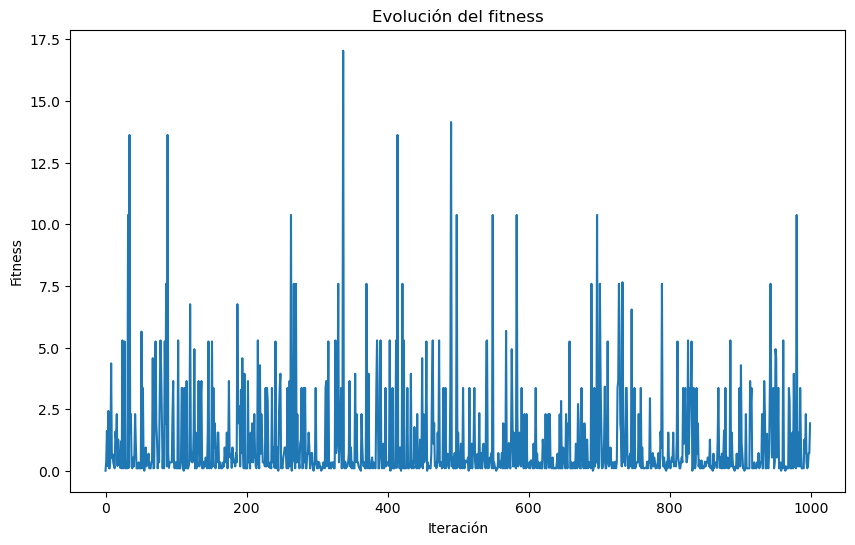

In [1]:
import numpy as np
import random

# Función de Beale
def beale(x, y):
    return (1.5 - x + x * y) ** 2 + (2.25 - x + x * y ** 2) ** 2 + (2.625 - x + x * y ** 3) ** 2

# Función para inicializar la población
def inicializarPoblacion(tamanoPoblacion, longitudCromosoma):
    return np.random.randint(2, size=(tamanoPoblacion, longitudCromosoma)) 

# Función para decodificar un cromosoma
def decodificar(cromosoma, minimo, maximo):
    decimal = int("".join(str(bit) for bit in cromosoma), 2) # Convierte el cromosoma que es una lista a un número decimal
    return minimo + decimal * (maximo - minimo) / (2**len(cromosoma) - 1)

# Función para evaluar el fitness de la población
def evaluarFitness(poblacion, minimo, maximo):
    fitness = []
    for cromosoma in poblacion:
        x = decodificar(cromosoma[:len(cromosoma)//2], minimo, maximo) 
        y = decodificar(cromosoma[len(cromosoma)//2:], minimo, maximo)
        fitness.append(-beale(x, y))  # Maximizar el fitness es lo mismo que minimizar la función de Beale
    return np.array(fitness)

# Función para seleccionar los padres para el cruce
def seleccionarPadres(poblacion, fitness, numPadres):
    padres = np.random.choice(np.arange(len(poblacion)), size=numPadres, p=fitness / fitness.sum(), replace=False)
    return [poblacion[i] for i in padres]

# Función para realizar el cruce
def cruzar(padre1, padre2):
    puntoCruce = random.randint(1, len(padre1) - 1)
    hijo1 = np.concatenate((padre1[:puntoCruce], padre2[puntoCruce:]))
    hijo2 = np.concatenate((padre2[:puntoCruce], padre1[puntoCruce:]))
    return hijo1, hijo2

# Función para realizar la mutación
def mutar(individuo, tasaMutacion):
    for i in range(len(individuo)):
        if random.random() < tasaMutacion:
            individuo[i] = 1 - individuo[i]  # Cambia el bit

def algoritmoGenetico(numeroDimensiones, tamanoPoblacion, longitudCromosoma, maximasIteraciones, tasaMutacion):
    mejoresFitness = []
    # Inicialización
    poblacion = inicializarPoblacion(tamanoPoblacion, longitudCromosoma)
    fitnessPoblacion = evaluarFitness(poblacion, -4.5, 4.5)
    mejorSolucion = poblacion[np.argmax(fitnessPoblacion)]

    # Bucle principal
    for i in range(maximasIteraciones):
        # Selección
        padres = seleccionarPadres(poblacion, fitnessPoblacion, tamanoPoblacion)

        # Cruce
        hijos = []
        for i in range(0, len(padres), 2):
            hijo1, hijo2 = cruzar(padres[i], padres[i+1])
            hijos.append(hijo1)
            hijos.append(hijo2)

        # Mutación
        for hijo in hijos:
            mutar(hijo, tasaMutacion)

        # Actualización de la población
        poblacion = padres + hijos
        fitnessPoblacion = evaluarFitness(poblacion, -4.5, 4.5)

        # Actualización de la mejor solución encontrada
        if np.max(fitnessPoblacion) > np.max(evaluarFitness([mejorSolucion], -4.5, 4.5)):
            mejorSolucion = poblacion[np.argmax(fitnessPoblacion)]
        
        #Imprimo el fitness de la mejor solución en cada iteración
        print("Mejor Fitness Epoca:", i, ":", -np.max(fitnessPoblacion))
        mejoresFitness.append(-np.max(fitnessPoblacion))
        x = decodificar(mejorSolucion[:len(mejorSolucion)//2], -4.5, 4.5)
        y = decodificar(mejorSolucion[len(mejorSolucion)//2:], -4.5, 4.5)
        print("Mejor solución encontrada:", x, y)





    return mejoresFitness

import matplotlib.pyplot as plt

# Llama a la función principal con parámetros personalizables
mejoresFitness = algoritmoGenetico(numeroDimensiones=2, tamanoPoblacion=100, longitudCromosoma=10, maximasIteraciones=1000, tasaMutacion=0.1)

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(mejoresFitness)
plt.title('Evolución del fitness')
plt.xlabel('Iteración')
plt.ylabel('Fitness')
plt.show()

- Travelling Salesman Problem: para este problema encuentre un esquema para representar una solución a este problema, y busque soluciones para grafos completamente conectados para tamaños (número de nodos): 50, 100 y 150.

Mejor Fitness Epoca: 0 : 0.00419804873327258
Mejor recorrido encontrado: [48, 34, 33, 23, 8, 38, 43, 39, 21, 30, 20, 7, 35, 3, 32, 29, 13, 15, 4, 14, 40, 44, 46, 36, 9, 25, 42, 5, 24, 19, 26, 0, 1, 28, 17, 11, 16, 18, 27, 22, 6, 12, 49, 2, 41, 45, 10, 37, 31, 47]
Mejor Fitness Epoca: 1 : 0.00419657028881948
Mejor recorrido encontrado: [48, 34, 33, 23, 8, 38, 43, 39, 21, 30, 20, 7, 35, 3, 32, 29, 13, 15, 4, 14, 40, 44, 46, 36, 9, 25, 42, 5, 24, 19, 26, 0, 1, 28, 17, 11, 16, 18, 27, 22, 6, 12, 49, 2, 41, 45, 10, 37, 31, 47]
Mejor Fitness Epoca: 2 : 0.004185528018960293
Mejor recorrido encontrado: [48, 34, 33, 23, 8, 38, 43, 39, 21, 30, 20, 7, 35, 3, 32, 29, 13, 15, 4, 14, 40, 44, 46, 36, 9, 25, 42, 5, 24, 19, 26, 0, 1, 28, 17, 11, 16, 18, 27, 22, 6, 12, 49, 2, 41, 45, 10, 37, 31, 47]
Mejor Fitness Epoca: 3 : 0.0042924236248213414
Mejor recorrido encontrado: [48, 34, 33, 23, 8, 38, 43, 39, 21, 30, 20, 7, 35, 3, 32, 29, 13, 15, 4, 14, 40, 44, 46, 36, 9, 25, 42, 5, 24, 19, 26, 0, 1, 28, 17,

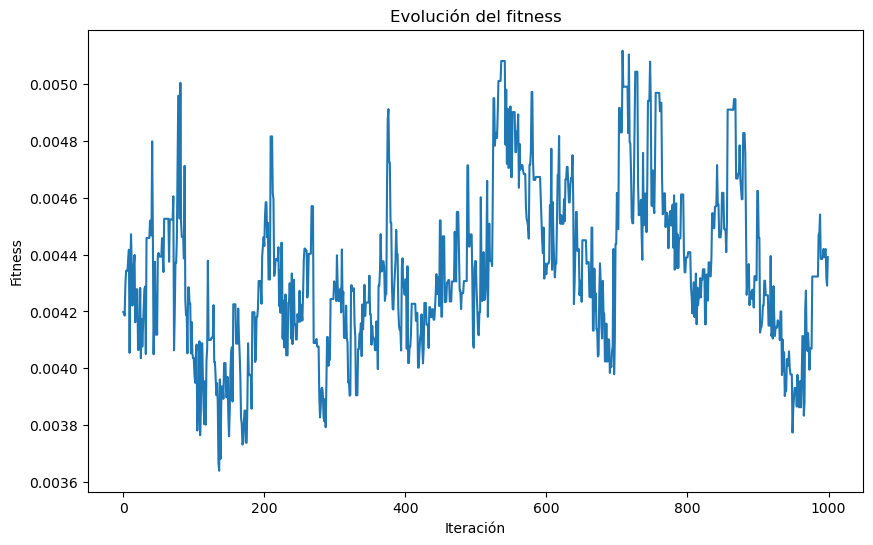

In [2]:
import numpy as np
import random

# Función para calcular la distancia total de un recorrido
def calcularDistanciaTotal(recorrido, matrizDistancias):
    return sum(matrizDistancias[recorrido[i - 1]][recorrido[i]] for i in range(len(recorrido)))

# Función para generar una población inicial
def generarPoblacionInicial(tamano, nCiudades):
    return [random.sample(range(nCiudades), nCiudades) for _ in range(tamano)]

# Función para calcular el fitness de cada individuo de la población
def calcularFitness(poblacion, matrizDistancias):
    return np.array([1 / calcularDistanciaTotal(recorrido, matrizDistancias) for recorrido in poblacion])

# Función para seleccionar los padres para el cruce
def seleccionarPadres(poblacion, fitness, numPadres):
    padres = np.random.choice(np.arange(len(poblacion)), size=numPadres, p=fitness / fitness.sum(), replace=False)
    return [poblacion[i] for i in padres]

# Función para realizar el cruce (operador de orden)
def cruzar(padre1, padre2):
    tamano = len(padre1)
    indice1, indice2 = sorted(random.sample(range(tamano), 2))
    hijo = [-1] * tamano
    hijo[indice1:indice2] = padre1[indice1:indice2]
    for gen in padre2:
        if gen not in hijo:
            for i in range(tamano):
                if hijo[i] == -1:
                    hijo[i] = gen
                    break
    return hijo

# Función para realizar la mutación (intercambio de dos ciudades)
def mutar(recorrido):
    indice1, indice2 = random.sample(range(len(recorrido)), 2)
    recorrido[indice1], recorrido[indice2] = recorrido[indice2], recorrido[indice1]

def algoritmoViajante(nCiudades, tamanoPoblacion, numIteraciones, numPadres, tasaMutacion):
    mejoresFitness = []
    # Generar una matriz de distancias aleatoria
    matrizDistancias = np.random.uniform(1, 10, (nCiudades, nCiudades))
    for i in range(nCiudades):
        for j in range(i + 1, nCiudades):
            matrizDistancias[i][j] = matrizDistancias[j][i]

    # Inicialización
    poblacion = generarPoblacionInicial(tamanoPoblacion, nCiudades)
    fitness = calcularFitness(poblacion, matrizDistancias)
    mejorRecorrido = poblacion[np.argmax(fitness)]

    # Bucle principal
    for i in range(numIteraciones):
        # Selección
        padres = seleccionarPadres(poblacion, fitness, numPadres)

        # Cruce
        hijos = []
        for j in range(0, len(padres), 2):
            hijos.append(cruzar(padres[j], padres[j + 1]))
            hijos.append(cruzar(padres[j + 1], padres[j]))

        # Mutación
        for hijo in hijos:
            if random.random() < tasaMutacion:
                mutar(hijo)

        # Actualización de la población
        poblacion = padres + hijos
        fitness = calcularFitness(poblacion, matrizDistancias)

        # Actualización del mejor recorrido encontrado
        if np.max(fitness) > 1 / calcularDistanciaTotal(mejorRecorrido, matrizDistancias):
            mejorRecorrido = poblacion[np.argmax(fitness)]
        
        #Imprimo el fitness de la mejor solución en cada iteración
        print("Mejor Fitness Epoca:", i, ":", np.max(fitness))
        mejoresFitness.append(np.max(fitness))
        #Imprimo el mejor recorrido encontrado en cada iteración
        print("Mejor recorrido encontrado:", mejorRecorrido)

    print("Mejor recorrido encontrado:", mejorRecorrido)
    print("Distancia total del mejor recorrido:", calcularDistanciaTotal(mejorRecorrido, matrizDistancias))
    return mejoresFitness

# Llama a la función principal con parámetros personalizables
viajante = algoritmoViajante(nCiudades=50, tamanoPoblacion=50, numIteraciones=1000, numPadres=20, tasaMutacion=0.1)

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(viajante)
plt.title('Evolución del fitness')
plt.xlabel('Iteración')
plt.ylabel('Fitness')
plt.show()

Mejor Fitness Epoca: 0 : 0.0019980587913120272
Mejor recorrido encontrado: [84, 99, 79, 8, 98, 26, 78, 82, 10, 15, 45, 1, 73, 25, 17, 49, 51, 76, 35, 74, 12, 2, 0, 80, 94, 28, 30, 87, 34, 29, 23, 3, 93, 71, 59, 32, 16, 39, 54, 31, 14, 27, 18, 77, 5, 53, 9, 81, 95, 55, 85, 44, 89, 90, 67, 43, 48, 72, 66, 69, 97, 88, 52, 83, 38, 75, 47, 36, 37, 22, 21, 40, 96, 61, 50, 57, 46, 63, 4, 13, 60, 42, 6, 20, 62, 70, 58, 91, 7, 33, 64, 65, 92, 56, 86, 24, 11, 19, 41, 68]
Mejor Fitness Epoca: 1 : 0.001966778594591945
Mejor recorrido encontrado: [84, 99, 79, 8, 98, 26, 78, 82, 10, 15, 45, 1, 73, 25, 17, 49, 51, 76, 35, 74, 12, 2, 0, 80, 94, 28, 30, 87, 34, 29, 23, 3, 93, 71, 59, 32, 16, 39, 54, 31, 14, 27, 18, 77, 5, 53, 9, 81, 95, 55, 85, 44, 89, 90, 67, 43, 48, 72, 66, 69, 97, 88, 52, 83, 38, 75, 47, 36, 37, 22, 21, 40, 96, 61, 50, 57, 46, 63, 4, 13, 60, 42, 6, 20, 62, 70, 58, 91, 7, 33, 64, 65, 92, 56, 86, 24, 11, 19, 41, 68]
Mejor Fitness Epoca: 2 : 0.0019256866565860113
Mejor recorrido encont

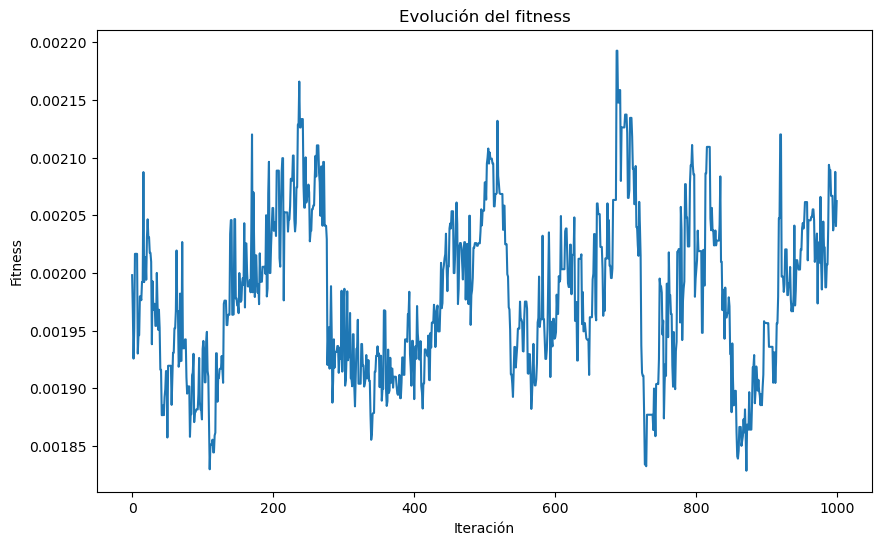

In [3]:
# Llama a la función principal con parámetros personalizables
viajante = algoritmoViajante(nCiudades=100, tamanoPoblacion=50, numIteraciones=1000, numPadres=20, tasaMutacion=0.1)

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(viajante)
plt.title('Evolución del fitness')
plt.xlabel('Iteración')
plt.ylabel('Fitness')
plt.show()

Mejor Fitness Epoca: 0 : 0.0013431925882767361
Mejor recorrido encontrado: [54, 126, 138, 10, 144, 139, 94, 137, 37, 92, 127, 66, 85, 74, 20, 109, 48, 47, 69, 45, 72, 15, 52, 67, 38, 97, 143, 25, 3, 123, 17, 18, 46, 7, 19, 76, 86, 90, 149, 134, 81, 51, 29, 117, 34, 11, 91, 88, 41, 23, 95, 28, 135, 33, 120, 13, 14, 53, 108, 104, 145, 27, 61, 1, 6, 60, 107, 84, 42, 147, 113, 39, 21, 12, 131, 80, 121, 55, 32, 62, 140, 130, 103, 133, 44, 59, 148, 77, 63, 122, 128, 56, 146, 105, 65, 111, 16, 75, 129, 36, 24, 71, 101, 141, 70, 49, 68, 43, 89, 57, 87, 96, 136, 100, 50, 58, 40, 114, 30, 78, 102, 79, 5, 119, 73, 98, 2, 112, 0, 106, 124, 132, 8, 83, 64, 99, 9, 142, 82, 26, 93, 118, 125, 4, 31, 22, 35, 116, 115, 110]
Mejor Fitness Epoca: 1 : 0.001326555084073041
Mejor recorrido encontrado: [54, 126, 138, 10, 144, 139, 94, 137, 37, 92, 127, 66, 85, 74, 20, 109, 48, 47, 69, 45, 72, 15, 52, 67, 38, 97, 143, 25, 3, 123, 17, 18, 46, 7, 19, 76, 86, 90, 149, 134, 81, 51, 29, 117, 34, 11, 91, 88, 41, 23,

Mejor Fitness Epoca: 29 : 0.0013252446288448702
Mejor recorrido encontrado: [62, 11, 67, 120, 28, 133, 56, 127, 135, 104, 145, 61, 39, 105, 44, 7, 45, 46, 35, 53, 117, 26, 18, 141, 63, 118, 37, 125, 134, 23, 106, 21, 66, 72, 80, 25, 4, 121, 78, 68, 43, 77, 24, 69, 96, 20, 122, 89, 101, 100, 114, 16, 136, 81, 33, 116, 137, 48, 109, 132, 1, 84, 131, 15, 90, 32, 51, 41, 103, 19, 147, 52, 143, 76, 0, 146, 6, 115, 119, 99, 58, 83, 144, 42, 60, 22, 71, 14, 126, 17, 13, 88, 8, 97, 27, 9, 55, 79, 138, 82, 47, 149, 93, 86, 54, 30, 107, 92, 108, 75, 65, 124, 3, 113, 49, 31, 74, 140, 142, 85, 110, 123, 98, 91, 40, 5, 94, 87, 34, 129, 36, 95, 29, 70, 57, 10, 130, 112, 73, 2, 64, 102, 59, 12, 111, 148, 38, 128, 139, 50]
Mejor Fitness Epoca: 30 : 0.0013252446288448702
Mejor recorrido encontrado: [62, 11, 67, 120, 28, 133, 56, 127, 135, 104, 145, 61, 39, 105, 44, 7, 45, 46, 35, 53, 117, 26, 18, 141, 63, 118, 37, 125, 134, 23, 106, 21, 66, 72, 80, 25, 4, 121, 78, 68, 43, 77, 24, 69, 96, 20, 122, 89, 1

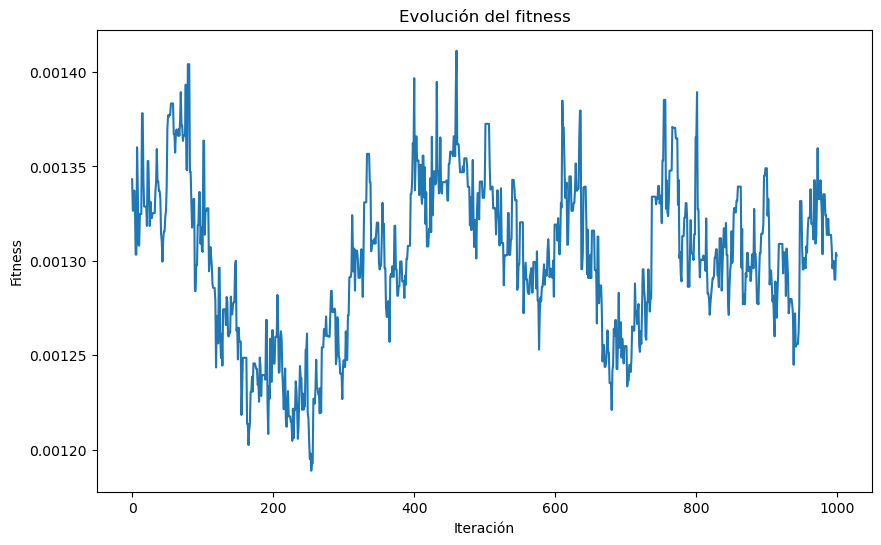

In [4]:
# Llama a la función principal con parámetros personalizables
viajante = algoritmoViajante(nCiudades=150, tamanoPoblacion=50, numIteraciones=1000, numPadres=20, tasaMutacion=0.1)

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(viajante)
plt.title('Evolución del fitness')
plt.xlabel('Iteración')
plt.ylabel('Fitness')
plt.show()

2. Implementación de Particle Swarm Optimization Algorithm (PSO): Escriba una implementación de este algoritmo que permita recibir sus hiperparámetros, el número de partíulas y el total de épocas a correr cada simulación.
- Función de Beale: tal como trabajaron previamente en los ejercicios de clase.
Encuentre la solución óptima de la Función de Beale.

Mejor Fitness Epoca: 0 : 1875.0756695036544
Mejor solución encontrada: [1.16149884 0.02408227]
Mejor Fitness Epoca: 1 : 40.72177408398014
Mejor solución encontrada: [1.88388443 0.24849361]
Mejor Fitness Epoca: 2 : 3.7838447543646714
Mejor solución encontrada: [2.58481097 0.46623864]
Mejor Fitness Epoca: 3 : 57.08337906704624
Mejor solución encontrada: [2.83532166 0.35280969]
Mejor Fitness Epoca: 4 : 12.963748765612827
Mejor solución encontrada: [2.998106   0.50307779]
Mejor Fitness Epoca: 5 : 3.3769532258971635
Mejor solución encontrada: [3.02952188 0.4670611 ]
Mejor Fitness Epoca: 6 : 0.16961657556551848
Mejor solución encontrada: [2.98792809 0.48985037]
Mejor Fitness Epoca: 7 : 3.1644724213216815
Mejor solución encontrada: [3.11837094 0.51202137]
Mejor Fitness Epoca: 8 : 0.7326064246756283
Mejor solución encontrada: [3.15820948 0.51879261]
Mejor Fitness Epoca: 9 : 0.12654046968076124
Mejor solución encontrada: [3.08397438 0.51689155]
Mejor Fitness Epoca: 10 : 0.7152206504477063
Mejor

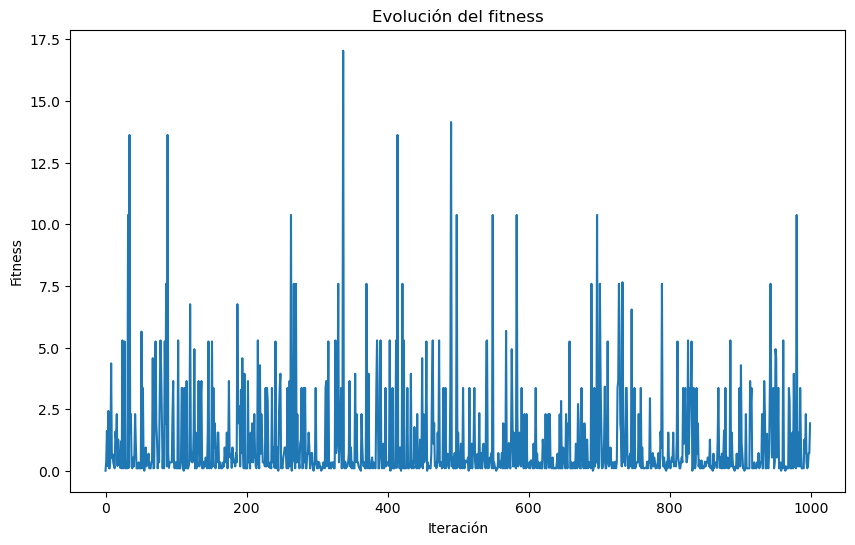

In [5]:
import numpy as np
import random
import math

# Función de Beale
def beale(x):
    return (1.5 - x[0] + x[0] * x[1]) ** 2 + (2.25 - x[0] + x[0] * x[1] ** 2) ** 2 + (2.625 - x[0] + x[0] * x[1] ** 3) ** 2

# Función de Rastrigin
def rastrigin(x):
    return 10 * len(x) + sum([(i**2 - 10 * math.cos(2 * math.pi * i)) for i in x])

def pso(epocas, n, peso, c1, c2, min, max, func=beale):
    mejoresFitness = []
    # Inicialización
    particulas = np.random.uniform(min, max, (n, 2)) # inicializamos las particulas
    velocidades = np.zeros((n, 2)) # inicializamos las velocidades
    fitness = np.array([func(x) for x in particulas])
    mejorPosiciones = particulas.copy()
    mejorFitness = fitness.copy()
    mejorGlobal = particulas[np.argmin(fitness)]

    # Bucle principal
    for i in range(epocas):
        for j in range(n):
            # Actualizar la velocidad
            velocidades[j] = peso * velocidades[j] + c1 * random.random() * (mejorPosiciones[j] - particulas[j]) + c2 * random.random() * (mejorGlobal - particulas[j])

            # Actualizar la posición
            particulas[j] += velocidades[j]

            # Actualizar el mejor fitness
            fitnessActual = func(particulas[j])
            if fitnessActual < mejorFitness[j]:
                mejorPosiciones[j] = particulas[j]
                mejorFitness[j] = fitnessActual

                if fitnessActual < func(mejorGlobal):
                    mejorGlobal = particulas[j]

        #Imprimo el fitness de la mejor solución en cada iteración
        print("Mejor Fitness Epoca:", i, ":", fitnessActual)
        mejoresFitness.append(-fitnessActual)
        #Imprimo el mejor recorrido encontrado en cada iteración
        print("Mejor solución encontrada:", mejorGlobal)

    return mejorGlobal, func(mejorGlobal)

solucion, fitness = pso(epocas=1000, n=10, peso=0.5, c1=0.5, c2=0.9, min=-4.5, max=4.5, func=beale)
print("Solucion:", solucion)
print("Fitness:", fitness)

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(mejoresFitness)
plt.title('Evolución del fitness')
plt.xlabel('Iteración')
plt.ylabel('Fitness')
plt.show()




- Función de Rastrigin para A = 10, y n = 10: para este ejercicio, ejecute el algoritmo
de optimización para las condiciones de esta función.

Mejor Fitness Epoca: 0 : 18.186681211184368
Mejor solución encontrada: [0.05713377 1.68763906]
Mejor Fitness Epoca: 1 : 11.439775288908791
Mejor solución encontrada: [1.12651727 1.86897215]
Mejor Fitness Epoca: 2 : 12.148396965092534
Mejor solución encontrada: [0.09317212 2.05641071]
Mejor Fitness Epoca: 3 : 6.877633643919104
Mejor solución encontrada: [-0.03253681  1.98455449]
Mejor Fitness Epoca: 4 : 21.93130599444243
Mejor solución encontrada: [-0.34918571  2.14022891]
Mejor Fitness Epoca: 5 : 28.112369786590435
Mejor solución encontrada: [-0.40953842  2.16990017]
Mejor Fitness Epoca: 6 : 23.58119792318702
Mejor solución encontrada: [-0.33326652  2.13240254]
Mejor Fitness Epoca: 7 : 4.418918794590272
Mejor solución encontrada: [0.03637863 1.98138432]
Mejor Fitness Epoca: 8 : 9.956623175495578
Mejor solución encontrada: [0.02301112 1.96635214]
Mejor Fitness Epoca: 9 : 8.965071748223027
Mejor solución encontrada: [0.99630568 1.93056919]
Mejor Fitness Epoca: 10 : 7.283986034846414
Mejo

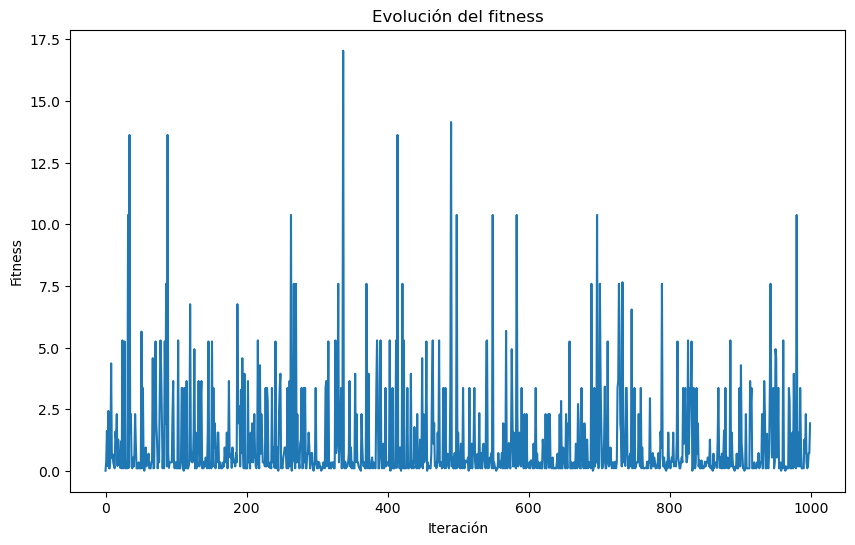

In [6]:
solucion, fitness = pso(epocas=1000, n=10, peso=0.5, c1=0.5, c2=0.9, min=-5.12, max=5.12, func=rastrigin)
print("Solucion:", solucion)
print("Fitness:", fitness)

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(mejoresFitness)
plt.title('Evolución del fitness')
plt.xlabel('Iteración')
plt.ylabel('Fitness')
plt.show()

Implementación de Ant System Algorithm (ACO-AS): Escriba una implementación para el algoritmo de Ant System para resolver el problema de Travelling Salesman. Es importante que su algoritmo permita definir el número de hormigas y el número de épocas a ejecutar la simulación
- Travelling Salesman Problem: para este problema utilice los mismos grafos generados para la sección (1) de esta tarea. Es decir, grafos de 50, 100 y 150 nodos.

Mejor Fitness Epoca: 0 : 6.142232655371805
Mejor solución encontrada: [25, 20, 43, 46, 31, 24, 33, 23, 5, 11, 13, 30, 19, 9, 28, 22, 2, 8, 38, 35, 34, 40, 41, 1, 27, 44, 37, 21, 47, 6, 39, 17, 18, 7, 42, 26, 49, 12, 10, 32, 0, 14, 29, 3, 45, 16, 36, 15, 48, 4]
Mejor Fitness Epoca: 1 : 6.142232655371805
Mejor solución encontrada: [25, 20, 43, 46, 31, 24, 33, 23, 5, 11, 13, 30, 19, 9, 28, 22, 2, 8, 38, 35, 34, 40, 41, 1, 27, 44, 37, 21, 47, 6, 39, 17, 18, 7, 42, 26, 49, 12, 10, 32, 0, 14, 29, 3, 45, 16, 36, 15, 48, 4]
Mejor Fitness Epoca: 2 : 6.142232655371805
Mejor solución encontrada: [25, 20, 43, 46, 31, 24, 33, 23, 5, 11, 13, 30, 19, 9, 28, 22, 2, 8, 38, 35, 34, 40, 41, 1, 27, 44, 37, 21, 47, 6, 39, 17, 18, 7, 42, 26, 49, 12, 10, 32, 0, 14, 29, 3, 45, 16, 36, 15, 48, 4]
Mejor Fitness Epoca: 3 : 6.11893082509016
Mejor solución encontrada: [15, 4, 48, 36, 1, 41, 40, 27, 30, 13, 19, 9, 22, 28, 2, 8, 35, 34, 44, 38, 6, 21, 47, 37, 11, 5, 23, 24, 33, 18, 26, 10, 12, 49, 42, 7, 17, 39, 43,

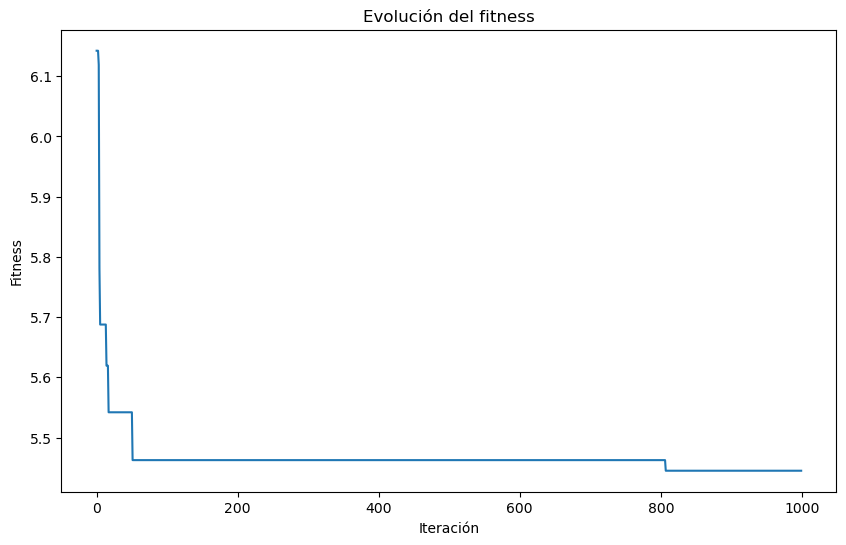

In [10]:
def distanciaEntrePuntos(punto1, punto2):
    return np.sqrt(np.sum((punto1 - [punto2])**2))

def poblacionInicial(ciudades):
    numeroCiudades = len(ciudades)
    feromonas = np.ones((numeroCiudades, numeroCiudades)) # matriz de feromonas
    mejorCamino = None
    mejorDistancia = np.inf # infinita
    return numeroCiudades, feromonas, mejorCamino, mejorDistancia

def seleccionarCiudadNueva(ciudadActual, ciudadesVisitadas, feromona, puntos, alfa,beta):
    noVisitadas = np.where(np.logical_not(ciudadesVisitadas))[0]
    probabilidades = np.zeros(len(noVisitadas)) #probabilidad de ir a una ciudad
    for i, ciudadNoVisitada in enumerate(noVisitadas):
        probabilidades[i] = (feromona[ciudadActual][ciudadNoVisitada] ** alfa) * ((1.0 / distanciaEntrePuntos(puntos[ciudadActual], puntos[ciudadNoVisitada])) ** beta)

    probabilidades = probabilidades / np.sum(probabilidades)
    ciudadNueva = np.random.choice(noVisitadas,p=probabilidades)
    return ciudadNueva


def ant_colony_optimization(ciudades,numeroHormigas,epocas,evaporacion, alfa=1, beta=5):

    mejoresFitness = []

    numeroCuidades, feromonas, mejorCamino, mejorDistancia = poblacionInicial(ciudades)

    for epoca in range(epocas):
        caminos = []
        distancias = []
        for h in range(numeroHormigas):
            visitado = [False] * numeroCuidades
            ciudadActual = np.random.randint(0, numeroCuidades) # seleccionamos una ciudad aleatoria
            visitado[ciudadActual] = True
            camino = [ciudadActual]
            distancia = 0

            # construimos la solucion
            while False in visitado:
                ciudadNueva = seleccionarCiudadNueva(ciudadActual, visitado, feromonas, ciudades, alfa, beta)
                distancia += distanciaEntrePuntos(ciudades[ciudadActual], ciudades[ciudadNueva])
                ciudadActual = ciudadNueva
                visitado[ciudadActual] = True
                camino.append(ciudadActual)

            caminos.append(camino)
            distancias.append(distancia)
            
            if distancia < mejorDistancia:
                mejorCamino = camino
                mejorDistancia = distancia

        # actualizamos las feromonas
        feromonas = feromonas * evaporacion

        for i in range(len(caminos)):
            for j in range(numeroCuidades - 1):
                feromonas[caminos[i][j]][caminos[i][j + 1]] += 1.0 / distancias[i]

        #Imprimo el fitness de la mejor solución en cada iteración
        print("Mejor Fitness Epoca:", epoca, ":", mejorDistancia)
        mejoresFitness.append(mejorDistancia)
        #Imprimo el mejor recorrido encontrado en cada iteración
        print("Mejor solución encontrada:", mejorCamino)


    return mejorCamino, mejorDistancia, mejoresFitness

cuidades = np.random.rand(50,2)
solucion, fitness, mejoresFitness = ant_colony_optimization(cuidades,numeroHormigas=50,epocas=1000,evaporacion=0.8, alfa=1,beta=5)

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(mejoresFitness)
plt.title('Evolución del fitness')
plt.xlabel('Iteración')
plt.ylabel('Fitness')
plt.show()



Mejor Fitness Epoca: 0 : 9.447017736090253
Mejor solución encontrada: [90, 66, 23, 21, 73, 59, 4, 54, 34, 0, 43, 98, 39, 51, 30, 19, 84, 50, 41, 92, 55, 91, 14, 18, 29, 22, 88, 48, 12, 79, 93, 99, 87, 72, 96, 24, 64, 82, 7, 35, 2, 76, 27, 81, 49, 86, 89, 16, 80, 15, 42, 6, 71, 17, 10, 13, 61, 44, 36, 60, 37, 58, 46, 70, 1, 62, 28, 68, 74, 47, 45, 63, 94, 25, 53, 38, 52, 33, 65, 95, 31, 69, 20, 97, 75, 78, 32, 8, 83, 11, 26, 56, 9, 57, 40, 77, 85, 67, 5, 3]
Mejor Fitness Epoca: 1 : 9.412791956128618
Mejor solución encontrada: [18, 29, 84, 50, 19, 30, 59, 73, 54, 4, 21, 90, 66, 23, 51, 39, 98, 43, 0, 34, 5, 67, 85, 77, 40, 57, 9, 56, 11, 83, 26, 27, 81, 35, 2, 76, 82, 7, 96, 69, 97, 70, 46, 1, 62, 28, 74, 68, 47, 45, 63, 94, 95, 25, 53, 38, 65, 52, 33, 93, 55, 92, 41, 99, 91, 14, 22, 12, 48, 88, 87, 72, 64, 24, 75, 20, 78, 44, 61, 16, 80, 89, 86, 49, 8, 32, 42, 6, 15, 13, 10, 17, 71, 31, 60, 37, 58, 36, 79, 3]
Mejor Fitness Epoca: 2 : 8.911129597405974
Mejor solución encontrada: [72, 87,

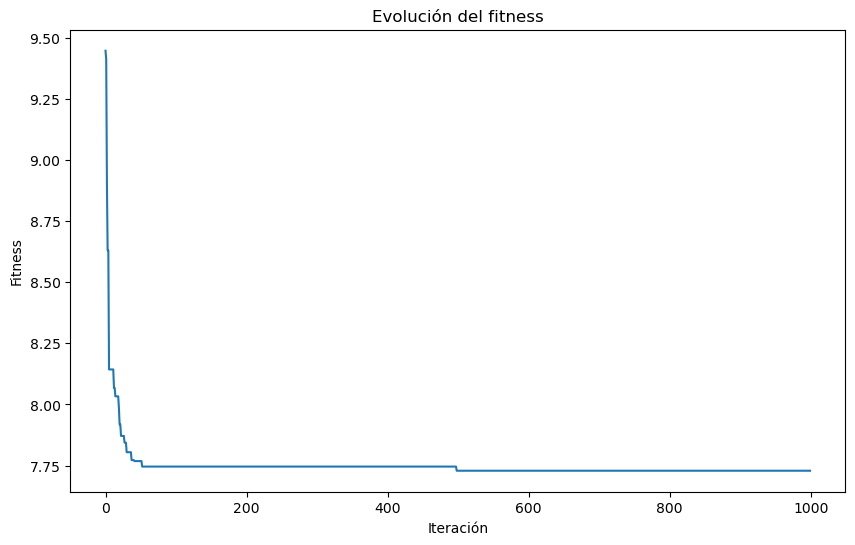

In [11]:
cuidades = np.random.rand(100,2)
solucion, fitness, mejoresFitness = ant_colony_optimization(cuidades,numeroHormigas=50,epocas=1000,evaporacion=0.8, alfa=1,beta=5)

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(mejoresFitness)
plt.title('Evolución del fitness')
plt.xlabel('Iteración')
plt.ylabel('Fitness')
plt.show()

Mejor Fitness Epoca: 0 : 12.225579068051657
Mejor solución encontrada: [143, 85, 80, 10, 147, 55, 112, 64, 108, 105, 129, 9, 125, 16, 103, 26, 113, 56, 138, 45, 135, 2, 84, 72, 14, 123, 29, 120, 46, 142, 24, 106, 34, 5, 44, 92, 35, 25, 49, 94, 149, 77, 68, 12, 28, 51, 70, 82, 107, 66, 146, 119, 102, 148, 40, 116, 11, 32, 52, 39, 74, 71, 27, 75, 36, 122, 136, 3, 8, 60, 111, 33, 18, 95, 87, 67, 37, 17, 22, 13, 86, 59, 31, 145, 19, 48, 104, 121, 81, 62, 144, 23, 130, 97, 128, 98, 43, 20, 114, 93, 101, 90, 15, 118, 110, 131, 133, 41, 83, 79, 141, 42, 76, 115, 7, 124, 78, 126, 4, 99, 89, 0, 54, 30, 137, 38, 6, 139, 69, 91, 117, 58, 88, 134, 53, 1, 21, 61, 73, 109, 127, 140, 50, 96, 47, 57, 65, 132, 63, 100]
Mejor Fitness Epoca: 1 : 11.540796899950411
Mejor solución encontrada: [13, 17, 22, 37, 15, 90, 118, 110, 131, 133, 41, 83, 141, 79, 46, 120, 123, 29, 42, 5, 76, 44, 92, 35, 25, 49, 94, 12, 28, 119, 146, 66, 102, 40, 148, 149, 77, 68, 115, 7, 124, 78, 126, 4, 89, 99, 33, 18, 95, 87, 67, 

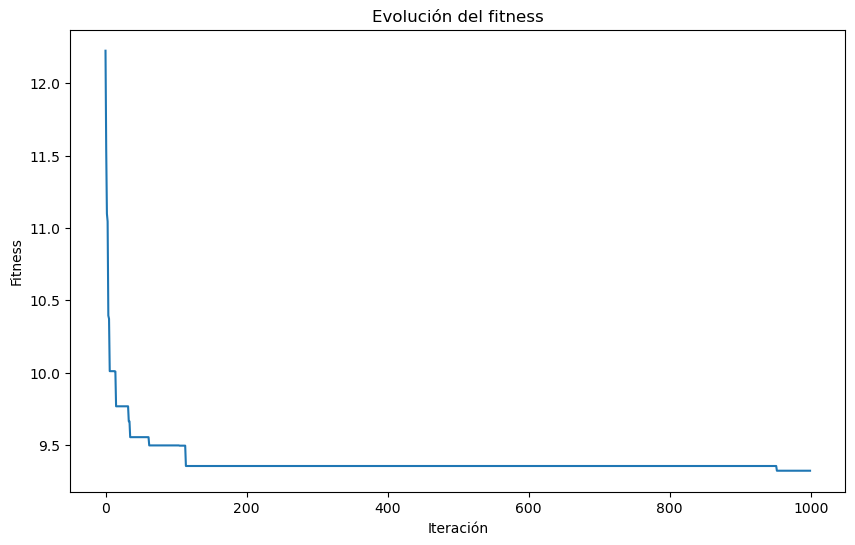

In [12]:
cuidades = np.random.rand(150,2)
ssolucion, fitness, mejoresFitness = ant_colony_optimization(cuidades,numeroHormigas=50,epocas=1000,evaporacion=0.8, alfa=1,beta=5)

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(mejoresFitness)
plt.title('Evolución del fitness')
plt.xlabel('Iteración')
plt.ylabel('Fitness')
plt.show()

4. Implementación de un algoritmo de los siguientes (elegir solo uno): utilizando los papers compartidos en el D2L, elijan un algoritmo de la siguiente lista e impleméntelo para proveer la solución de alguna de los problemas mencionados en esta tarea.
- Artificial Bee Colony Optimization (ABC)
- Grey Wolf Optimizer (GWO)
1 de 2.
 - Whale Optimization Algorithm (WAO) *Elegir un problema a optimizar.

Mejor Fitness Epoca: 0 : 3.563206877771776
Mejor solución encontrada: [ 2.55672094 -0.32481594]
Mejor Fitness Epoca: 1 : 1.1268570102858977
Mejor solución encontrada: [2.55672094 0.0166411 ]
Mejor Fitness Epoca: 2 : 0.8912412122134521
Mejor solución encontrada: [1.83401772 0.0166411 ]
Mejor Fitness Epoca: 3 : 0.6208190849705202
Mejor solución encontrada: [1.97316226 0.24569985]
Mejor Fitness Epoca: 4 : 0.17220332359190443
Mejor solución encontrada: [2.46518938 0.24569985]
Mejor Fitness Epoca: 5 : 0.17220332359190443
Mejor solución encontrada: [2.46518938 0.24569985]
Mejor Fitness Epoca: 6 : 0.17220332359190443
Mejor solución encontrada: [2.46518938 0.24569985]
Mejor Fitness Epoca: 7 : 0.17220332359190443
Mejor solución encontrada: [2.46518938 0.24569985]
Mejor Fitness Epoca: 8 : 0.17220332359190443
Mejor solución encontrada: [2.46518938 0.24569985]
Mejor Fitness Epoca: 9 : 0.17220332359190443
Mejor solución encontrada: [2.46518938 0.24569985]
Mejor Fitness Epoca: 10 : 0.172203323591904

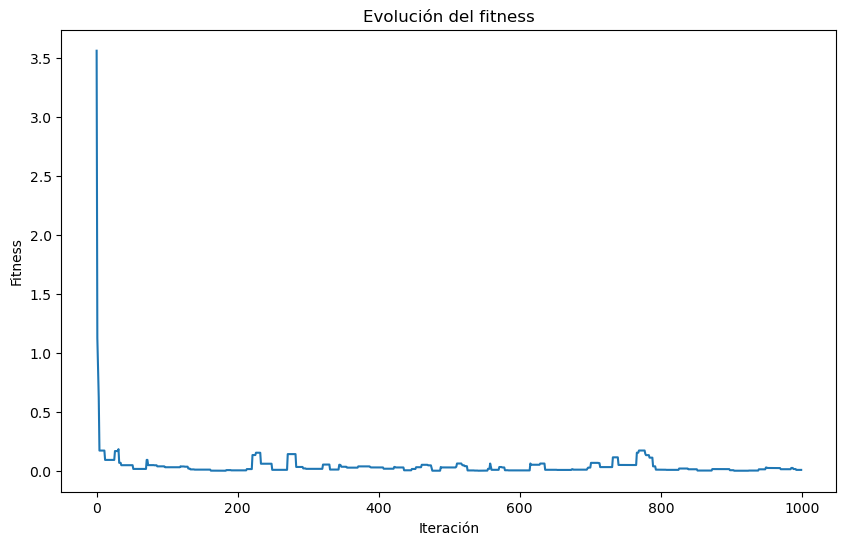

In [17]:
import numpy as np
import random

# Función de Beale
def beale(x, y):
    return (1.5 - x + x * y) ** 2 + (2.25 - x + x * y ** 2) ** 2 + (2.625 - x + x * y ** 3) ** 2

# Función para inicializar la población
def inicializarPoblacion(tamanoPoblacion, numeroDimensiones):
    return np.random.uniform(-4.5, 4.5, (tamanoPoblacion, numeroDimensiones))

# Función para evaluar el fitness de la población
def evaluarFitness(poblacion):
    return np.apply_along_axis(lambda x: beale(x[0], x[1]), 1, poblacion)

# Función para realizar la fase de las abejas empleadas
def abejasEmpleadas(poblacion, fitnessPoblacion, intentos,numeroDimensiones):
    for i in range(len(poblacion)):
        j, k = random.sample(range(numeroDimensiones), 2)
        phi = random.uniform(-1, 1)
        vecino = poblacion[i].copy()
        vecino[j] = poblacion[i, j] + phi * (poblacion[i, j] - poblacion[k, j])
        nuevoFitness = beale(vecino[0], vecino[1])
        if nuevoFitness < fitnessPoblacion[i]:
            poblacion[i] = vecino
            fitnessPoblacion[i] = nuevoFitness
            intentos[i] = 0
        else:
            intentos[i] += 1


# Función para realizar la fase de las abejas observadoras
def abejasObservadoras(poblacion, fitnessPoblacion, intentos,numeroDimensiones):
    probabilidadSeleccion = fitnessPoblacion / np.sum(fitnessPoblacion)
    i = np.random.choice(len(poblacion), p=probabilidadSeleccion)
    j, k = random.sample(range(numeroDimensiones), 2)
    phi = random.uniform(-1, 1)
    vecino = poblacion[i].copy()
    vecino[j] = poblacion[i, j] + phi * (poblacion[i, j] - poblacion[k, j])
    nuevoFitness = beale(vecino[0], vecino[1])
    if nuevoFitness < fitnessPoblacion[i]:
        poblacion[i] = vecino
        fitnessPoblacion[i] = nuevoFitness
        intentos[i] = 0
    else:
        intentos[i] += 1


# Función para realizar la fase de las abejas exploradoras
def abejasExploradoras(poblacion, fitnessPoblacion, intentos,numeroDimensiones):
    limiteAbandono = 10
    i = np.argmax(intentos)
    if intentos[i] > limiteAbandono:
        poblacion[i] = np.random.uniform(-4.5, 4.5, numeroDimensiones)
        nuevoFitness = beale(poblacion[i, 0], poblacion[i, 1])
        fitnessPoblacion[i] = nuevoFitness
        intentos[i] = 0

def algoritmoAbejas(numeroDimensiones, tamanoPoblacion, maximasIteraciones):
    mejoresFitness = []

    # Inicialización
    poblacion = inicializarPoblacion(tamanoPoblacion, numeroDimensiones)
    fitnessPoblacion = evaluarFitness(poblacion)
    intentos = np.zeros(tamanoPoblacion)
    mejorSolucion = poblacion[np.argmin(fitnessPoblacion)]

    # Bucle principal
    for i in range(maximasIteraciones):
        abejasEmpleadas(poblacion, fitnessPoblacion, intentos, numeroDimensiones)
        abejasObservadoras(poblacion, fitnessPoblacion, intentos,numeroDimensiones)
        abejasExploradoras(poblacion, fitnessPoblacion, intentos,numeroDimensiones)

        # Actualiza la mejor solución encontrada
        if np.min(fitnessPoblacion) < beale(mejorSolucion[0], mejorSolucion[1]):
            mejorSolucion = poblacion[np.argmin(fitnessPoblacion)]

        #Imprimo el fitness de la mejor solución en cada iteración
        print("Mejor Fitness Epoca:", i, ":", np.min(fitnessPoblacion))
        mejoresFitness.append(np.min(fitnessPoblacion))
        #Imprimo el mejor recorrido encontrado en cada iteración
        print("Mejor solución encontrada:", mejorSolucion)

    return mejoresFitness

# Llama a la función principal con parámetros personalizables
abejas = algoritmoAbejas(numeroDimensiones=2, tamanoPoblacion=50, maximasIteraciones=1000)

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(abejas)
plt.title('Evolución del fitness')
plt.xlabel('Iteración')
plt.ylabel('Fitness')
plt.show()


### Para el punto extra

Mejor Fitness Epoca: 4 : 0.004377558840357562
Mejor recorrido encontrado: [48, 23, 24, 49, 16, 29, 30, 8, 32, 3, 28, 34, 42, 17, 1, 43, 39, 45, 5, 9, 18, 41, 36, 46, 40, 12, 33, 44, 26, 4, 11, 2, 15, 38, 0, 14, 47, 10, 22, 6, 37, 27, 19, 25, 20, 13, 21, 7, 31, 35]
Mejor Fitness Epoca: 5 : 0.004387960828929507
Mejor recorrido encontrado: [35, 6, 26, 42, 16, 49, 29, 27, 41, 44, 24, 25, 37, 40, 36, 0, 1, 5, 7, 31, 45, 38, 19, 11, 23, 34, 21, 30, 47, 20, 18, 9, 22, 10, 17, 3, 33, 46, 39, 12, 2, 15, 32, 8, 4, 28, 48, 13, 14, 43]
Mejor Fitness Epoca: 6 : 0.004451688374154736
Mejor recorrido encontrado: [41, 0, 39, 36, 14, 3, 33, 24, 13, 37, 22, 40, 34, 27, 30, 6, 15, 47, 17, 31, 26, 42, 25, 5, 19, 1, 29, 48, 12, 2, 43, 28, 46, 23, 8, 7, 18, 9, 10, 32, 38, 16, 21, 49, 11, 4, 45, 35, 44, 20]
Mejor Fitness Epoca: 8 : 0.004482251825716208
Mejor recorrido encontrado: [10, 13, 47, 26, 21, 2, 15, 1, 34, 9, 29, 28, 8, 17, 19, 5, 44, 33, 18, 23, 4, 36, 35, 37, 40, 22, 16, 46, 3, 31, 7, 38, 42, 49, 20

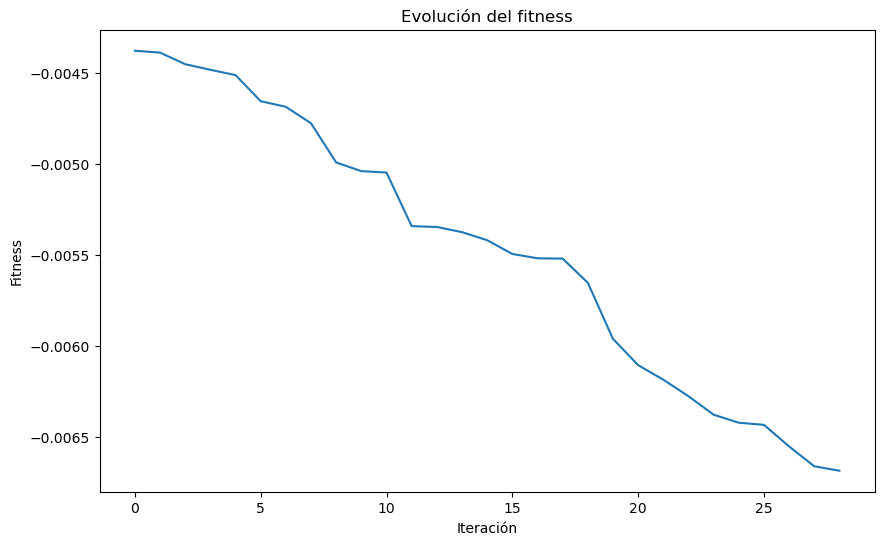

In [21]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Función para calcular la distancia total de un recorrido
def calcularDistanciaTotal(recorrido, matrizDistancias):
    return sum(matrizDistancias[recorrido[i - 1]][recorrido[i]] for i in range(len(recorrido)))

# Función para generar una población inicial
def generarPoblacionInicial(tamano, nCiudades):
    return [random.sample(range(nCiudades), nCiudades) for _ in range(tamano)]

# Función para calcular el fitness de cada individuo de la población
def calcularFitness(poblacion, matrizDistancias):
    return np.array([1 / calcularDistanciaTotal(recorrido, matrizDistancias) for recorrido in poblacion])

# Función para realizar la fase de las abejas empleadas
def abejasEmpleadas(poblacion, fitnessPoblacion, intentos, matrizDistancias):
    for i in range(len(poblacion)):
        j, k = random.sample(range(len(poblacion[i])), 2)
        vecino = poblacion[i].copy()
        vecino[j], vecino[k] = vecino[k], vecino[j]
        nuevoFitness = 1 / calcularDistanciaTotal(vecino, matrizDistancias)
        if nuevoFitness > fitnessPoblacion[i]:
            poblacion[i] = vecino
            fitnessPoblacion[i] = nuevoFitness
            intentos[i] = 0
        else:
            intentos[i] += 1

# Función para realizar la fase de las abejas observadoras
def abejasObservadoras(poblacion, fitnessPoblacion, intentos, matrizDistancias):
    probabilidadSeleccion = fitnessPoblacion / np.sum(fitnessPoblacion)
    i = np.random.choice(len(poblacion), p=probabilidadSeleccion)
    j, k = random.sample(range(len(poblacion[i])), 2)
    vecino = poblacion[i].copy()
    vecino[j], vecino[k] = vecino[k], vecino[j]
    nuevoFitness = 1 / calcularDistanciaTotal(vecino, matrizDistancias)
    if nuevoFitness > fitnessPoblacion[i]:
        poblacion[i] = vecino
        fitnessPoblacion[i] = nuevoFitness
        intentos[i] = 0
    else:
        intentos[i] += 1

# Función para realizar la fase de las abejas exploradoras
def abejasExploradoras(poblacion, fitnessPoblacion, intentos, nCiudades, matrizDistancias):
    i = np.argmax(intentos)
    limiteAbandono = 10
    if intentos[i] > limiteAbandono:
        poblacion[i] = random.sample(range(nCiudades), nCiudades)
        nuevoFitness = 1 / calcularDistanciaTotal(poblacion[i], matrizDistancias)
        fitnessPoblacion[i] = nuevoFitness
        intentos[i] = 0

def algoritmoAbejas(nCiudades, tamanoPoblacion, numIteraciones):
    mejoresFitness = []
    # Generar una matriz de distancias aleatoria
    matrizDistancias = np.random.uniform(1, 10, (nCiudades, nCiudades))
    for i in range(nCiudades):
        for j in range(i + 1, nCiudades):
            matrizDistancias[i][j] = matrizDistancias[j][i]

    # Inicialización
    poblacion = generarPoblacionInicial(tamanoPoblacion, nCiudades)
    fitnessPoblacion = calcularFitness(poblacion, matrizDistancias)
    intentos = np.zeros(tamanoPoblacion)
    mejorRecorrido = poblacion[np.argmax(fitnessPoblacion)]

    for k in range(numIteraciones):
        abejasEmpleadas(poblacion, fitnessPoblacion, intentos, matrizDistancias)
        abejasObservadoras(poblacion, fitnessPoblacion, intentos, matrizDistancias)
        abejasExploradoras(poblacion, fitnessPoblacion, intentos, nCiudades, matrizDistancias)

        # Actualiza la mejor solución encontrada
        if np.max(fitnessPoblacion) > 1 / calcularDistanciaTotal(mejorRecorrido, matrizDistancias):
            mejorRecorrido = poblacion[np.argmax(fitnessPoblacion)]
            # Imprimo el fitness de la mejor solución en cada iteración
            print("Mejor Fitness Epoca:", k, ":", np.max(fitnessPoblacion))
            mejoresFitness.append(-np.max(fitnessPoblacion))
            # Imprimo el mejor recorrido encontrado en cada iteración
            print("Mejor recorrido encontrado:", mejorRecorrido)

    return mejoresFitness

# Llama a la función principal con parámetros personalizables
abejas = algoritmoAbejas(nCiudades=50, tamanoPoblacion=50, numIteraciones=1000)

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(abejas)
plt.title('Evolución del fitness')
plt.xlabel('Iteración')
plt.ylabel('Fitness')
plt.show()



Mejor Fitness Epoca: 0 : 0.0020165881847980073
Mejor recorrido encontrado: [45, 98, 20, 65, 62, 10, 56, 77, 81, 42, 82, 57, 94, 58, 0, 29, 26, 17, 75, 49, 44, 43, 19, 79, 6, 7, 97, 16, 37, 85, 46, 52, 5, 2, 8, 84, 66, 14, 88, 96, 91, 33, 92, 74, 27, 11, 40, 18, 72, 39, 36, 70, 3, 31, 71, 67, 76, 32, 90, 13, 12, 38, 93, 60, 68, 9, 89, 34, 15, 47, 86, 50, 41, 95, 73, 30, 24, 78, 23, 55, 63, 54, 35, 22, 99, 48, 53, 59, 51, 64, 4, 83, 80, 61, 69, 1, 25, 28, 87, 21]
Mejor Fitness Epoca: 2 : 0.002033936571348317
Mejor recorrido encontrado: [45, 98, 20, 65, 62, 10, 56, 77, 81, 42, 82, 57, 94, 58, 0, 29, 26, 17, 75, 49, 44, 43, 19, 79, 6, 7, 97, 16, 37, 85, 46, 52, 5, 2, 8, 84, 66, 14, 88, 96, 91, 33, 92, 74, 27, 11, 40, 18, 72, 39, 36, 70, 3, 31, 71, 67, 76, 32, 90, 13, 12, 38, 93, 60, 68, 9, 89, 34, 15, 47, 86, 50, 41, 95, 73, 30, 24, 78, 23, 55, 63, 54, 35, 22, 99, 48, 53, 59, 51, 69, 4, 83, 80, 61, 64, 1, 25, 28, 87, 21]
Mejor Fitness Epoca: 7 : 0.0020835239214021927
Mejor recorrido encont

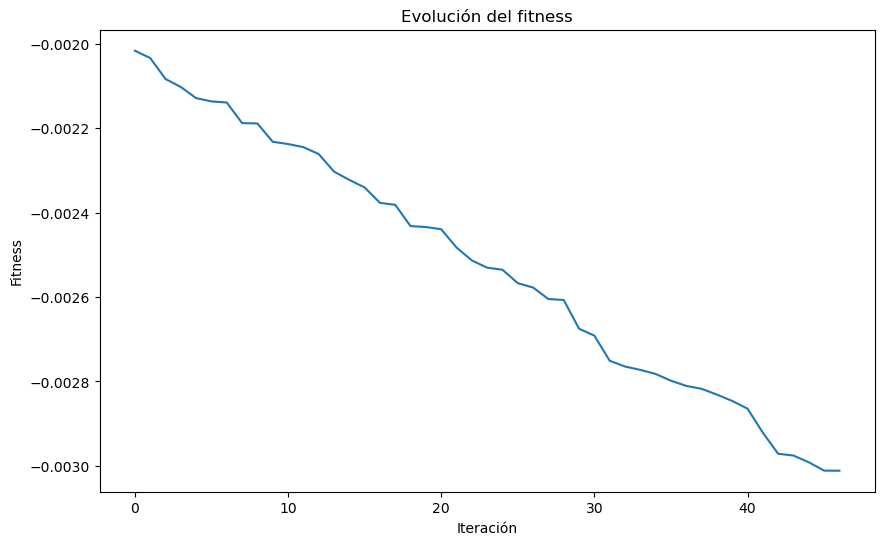

In [22]:
# Llama a la función principal con parámetros personalizables
abejas = algoritmoAbejas(nCiudades=100, tamanoPoblacion=50, numIteraciones=1000)

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(abejas)
plt.title('Evolución del fitness')
plt.xlabel('Iteración')
plt.ylabel('Fitness')
plt.show()

Mejor Fitness Epoca: 1 : 0.0013029630126885055
Mejor recorrido encontrado: [52, 105, 66, 87, 70, 145, 57, 30, 64, 42, 23, 123, 5, 135, 10, 107, 146, 44, 101, 149, 69, 113, 60, 76, 21, 12, 43, 148, 67, 54, 89, 130, 7, 4, 63, 14, 65, 140, 93, 79, 29, 92, 22, 77, 41, 27, 16, 26, 116, 73, 100, 108, 55, 141, 72, 46, 38, 17, 83, 90, 2, 80, 126, 131, 35, 82, 137, 1, 134, 97, 34, 144, 103, 61, 115, 8, 96, 94, 127, 74, 0, 142, 99, 81, 56, 53, 58, 49, 86, 133, 122, 119, 84, 24, 88, 15, 31, 6, 121, 36, 102, 136, 118, 112, 132, 110, 39, 47, 75, 129, 111, 78, 25, 106, 59, 143, 147, 18, 37, 13, 48, 124, 3, 114, 104, 62, 98, 95, 138, 128, 120, 51, 71, 9, 45, 32, 11, 68, 125, 50, 85, 20, 19, 117, 28, 91, 33, 40, 109, 139]
Mejor Fitness Epoca: 2 : 0.0013160961405960835
Mejor recorrido encontrado: [52, 105, 66, 87, 70, 145, 57, 30, 64, 42, 23, 123, 5, 135, 10, 107, 146, 44, 101, 143, 69, 113, 60, 76, 21, 12, 43, 148, 67, 54, 89, 130, 7, 4, 63, 14, 65, 140, 93, 79, 29, 92, 22, 77, 41, 27, 16, 26, 116, 73

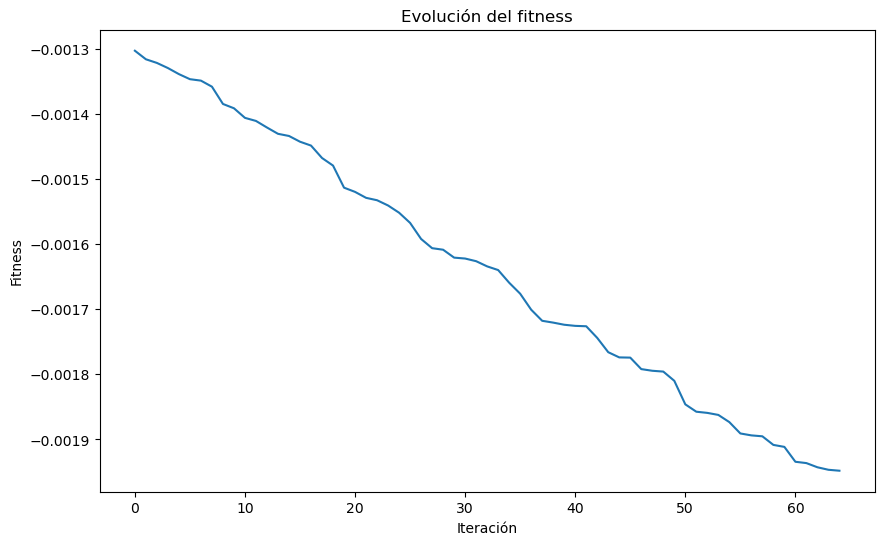

In [23]:
# Llama a la función principal con parámetros personalizables
abejas = algoritmoAbejas(nCiudades=150, tamanoPoblacion=50, numIteraciones=1000)

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(abejas)
plt.title('Evolución del fitness')
plt.xlabel('Iteración')
plt.ylabel('Fitness')
plt.show()

5. Comparar las soluciones de Travelling Salesman Problem GAs vs. ACO-AS
En su informe, agregue una tabla de comparación para las soluciones encontradas tanto para Gas como para ACO-AS para los 3 grafos generados.
Incluya una discusión de los resultados obtenidos.


#### Según los resultados obtenidos he creado esta tabla para comparar los resultados obtenidos para el problema del Travelling Salesman Problem.

| Genético  | Ant Colony  | Bee Colony |
|-----------|-----------|-----------|
| El algoritmo genético es un enfoque basado en la evolución biológica, donde se utilizan operadores genéticos como la selección, el cruce y la mutación para generar nuevas soluciones. | El algoritmo de colonia de hormigas se basa en el comportamiento de las hormigas reales, donde las hormigas construyen soluciones al TSP mediante la comunicación indirecta a través de feromonas. | El algoritmo de colonia de abejas se inspira en el comportamiento de las abejas, donde las abejas exploradoras buscan nuevas soluciones y las abejas obreras comparten información sobre la calidad de las soluciones. |
|El algoritmo genético es fácil de implementar, este es capaz de llegar a una solución, pero en este caso me di cuenta que es muy aleatorio, como se ve en la gráfica del mismo hay soluciones óptimas antes de terminar la ejecución del número de épocas, es por esto que es recomendado tener dentro del loop principal una forma de terminar las iteraciones antes de tiempo, dejando una solución aceptable en menor tiempo, por ejemplo podría verificar en cada época si el fitness es mayor o igual a algún estándar deseable| Este algoritmo a comparación del genético cuesta más implementar, pero a su vez encuenta soluciones mejores, el timepo que se toma en ejecución es tambien mayor y como vemos en su gráfica es ideal poner tambien un break al algoritmo cuando se llega a algún fitness deseado, pues es innecesario correr el algoritmo durante épocas donde ya no se ve una mejoría  | El mejor de todos los algoritmos en cuestión de optimizar la solución del problema, pero a su vez el más complejo de implementar, pues se debe tener en cuenta la cantidad de abejas exploradoras, la cantidad de abejas obreras, la cantidad de iteraciones, la cantidad de épocas, la cantidad de feromonas, la cantidad de soluciones, etc. este algoritmo es tan bueno que su tiempo de ejecución es casi inmedianto para este problema en específico y como podemos ver claramente mientras más épocas, más bajo el fitness   |
| tiempo de ejecución para 150 nodos : 4.9s| tiempo de ejecución para 150 nodos : 39m.23.2s | tiempo de ejecución para 150 nodos : 1.3s |
| fitness para 150 nodos : 0.0013027706772714824 | fitness para 150 nodos : 0.1072832001 | fitness para 150 nodos : 0.0019481066929041221 |

Con esto nos damos cuenta claramente que el mejor algoritmo para el problema de Traveling Salesman Problem es el de Bee Colony, pero a su vez es el más complejo de implementar, por otro lado vemos que el Ant Colony es un algoritmo muy bueno pero el tiempo de ejecución del mismo es muy alto, por lo que si se quiere una solución rápida y buena, el algoritmo genético es el indicado, pero si se quiere una solución óptima y se tiene tiempo para esperar, el Bee Colony es el indicado. 

Como hemos conversado en clase estos algoritmos para este problema en específico son de suma importancia para empresas de logística como amazon o dhl, es por esto que en mi conclusión he querido mencionar que si fuera el caso y yo estaría en una de estas empresas elegiría el algoritmo Bee Colony Optimization para resolver el problema del orden en que se entregan los paquetes por repartidor. Dicho esto es un algoritmo que podría tomar algo de tiempo en correr pero que es posible de computar en dispositivos móviles o en servidores por las noches para que al día siguiente los repartidores tengan una ruta óptima a través de por ejemplo un api call para entregar los paquetes.